A Simple Momentum Trading Strategy for Microsoft Stock

In [228]:
#!pip install yfinance
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf


In [229]:
msft = yf.download('msft', start="2021-06-01", end="2022-06-01") 

[*********************100%***********************]  1 of 1 completed


In [230]:
# The last 10 observations of `Close`
ts = msft['Close'][-10:]

# Check the type of `ts` 
type(ts)
ts

Date
2022-05-17    266.820007
2022-05-18    254.080002
2022-05-19    253.139999
2022-05-20    252.559998
2022-05-23    260.649994
2022-05-24    259.619995
2022-05-25    262.519989
2022-05-26    265.899994
2022-05-27    273.239990
2022-05-31    271.869995
Name: Close, dtype: float64

In [231]:
# Inspect the first rows
print(msft.loc[pd.Timestamp('2021-06-01'):pd.Timestamp('2022-06-01')])

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-06-01  251.229996  251.289993  246.960007  247.399994  245.396210   
2021-06-02  248.130005  249.270004  245.839996  247.300003  245.297012   
2021-06-03  245.220001  246.339996  243.000000  245.710007  243.719894   
2021-06-04  247.759995  251.649994  247.509995  250.789993  248.758728   
2021-06-07  249.979996  254.089996  249.809998  253.809998  251.754288   
...                ...         ...         ...         ...         ...   
2022-05-24  257.890015  261.329987  253.500000  259.619995  259.619995   
2022-05-25  258.140015  264.579987  257.130005  262.519989  262.519989   
2022-05-26  262.269989  267.109985  261.429993  265.899994  265.899994   
2022-05-27  268.480011  273.339996  267.559998  273.239990  273.239990   
2022-05-31  272.529999  274.769989  268.929993  271.869995  271.869995   

              Volume  
Date          

##Visualizing Time Series Data

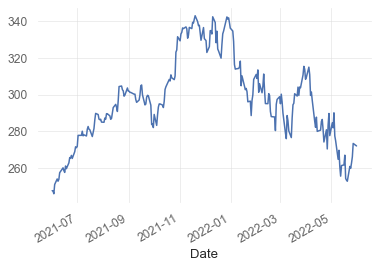

In [232]:
import matplotlib.pyplot as plt

# Plot the closing prices for `msft`
msft['Close'].plot(grid=True)
plt.show()

In [233]:
# Assign `Adj Close` to `daily_close`
daily_close = msft[['Close']]

# Daily returns
daily_pct_c = daily_close.pct_change()#The daily percentage change is calculated using pct_change() function

# Replace NA values with 0
daily_pct_c.fillna(0, inplace=True)

# Inspect daily returns
print(daily_pct_c)

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns
print(daily_log_returns)

               Close
Date                
2021-06-01  0.000000
2021-06-02 -0.000404
2021-06-03 -0.006429
2021-06-04  0.020675
2021-06-07  0.012042
...              ...
2022-05-24 -0.003952
2022-05-25  0.011170
2022-05-26  0.012875
2022-05-27  0.027604
2022-05-31 -0.005014

[253 rows x 1 columns]
               Close
Date                
2021-06-01       NaN
2021-06-02 -0.000404
2021-06-03 -0.006450
2021-06-04  0.020464
2021-06-07  0.011970
...              ...
2022-05-24 -0.003959
2022-05-25  0.011108
2022-05-26  0.012793
2022-05-27  0.027230
2022-05-31 -0.005027

[253 rows x 1 columns]


In [234]:
# Resample `msft` to business months, take last observation as value 
monthly = msft.resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
monthly.pct_change()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-30,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-30,0.053493,0.056383,0.053079,0.051717,0.051717,-0.032863
2021-08-31,0.067504,0.062234,0.061956,0.059563,0.061591,0.254980
2021-09-30,-0.061461,-0.054746,-0.065937,-0.066119,-0.066119,0.230482
2021-10-29,0.134472,0.153459,0.150131,0.176291,0.176291,0.074896
2021-11-30,0.034523,0.017410,0.015715,-0.003106,-0.001282,0.233550
2021-12-31,0.009513,0.004678,0.020852,0.017333,0.017333,-0.580260
2022-01-31,-0.087324,-0.079503,-0.087777,-0.075345,-0.075345,1.580135
2022-02-28,-0.047386,-0.042384,-0.043640,-0.039199,-0.037212,-0.254433


In [235]:
# Daily returns
daily_pct_c = daily_close/ daily_close.shift(1) - 1

# Print `daily_pct_c`
print(daily_pct_c)

               Close
Date                
2021-06-01       NaN
2021-06-02 -0.000404
2021-06-03 -0.006429
2021-06-04  0.020675
2021-06-07  0.012042
...              ...
2022-05-24 -0.003952
2022-05-25  0.011170
2022-05-26  0.012875
2022-05-27  0.027604
2022-05-31 -0.005014

[253 rows x 1 columns]


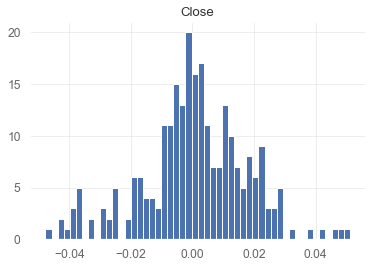

            Close
count  252.000000
mean     0.000520
std      0.017070
min     -0.047748
25%     -0.007416
50%      0.000125
75%      0.011232
max      0.051094


In [236]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot the distribution of `daily_pct_c`
daily_pct_c.hist(bins=50)
plt.show()

# Pull up summary statistics
print(daily_pct_c.describe())

In [237]:
# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_c).cumprod()

# Print `cum_daily_return`
print(cum_daily_return)

               Close
Date                
2021-06-01       NaN
2021-06-02  0.999596
2021-06-03  0.993169
2021-06-04  1.013703
2021-06-07  1.025909
...              ...
2022-05-24  1.049394
2022-05-25  1.061116
2022-05-26  1.074778
2022-05-27  1.104446
2022-05-31  1.098909

[253 rows x 1 columns]


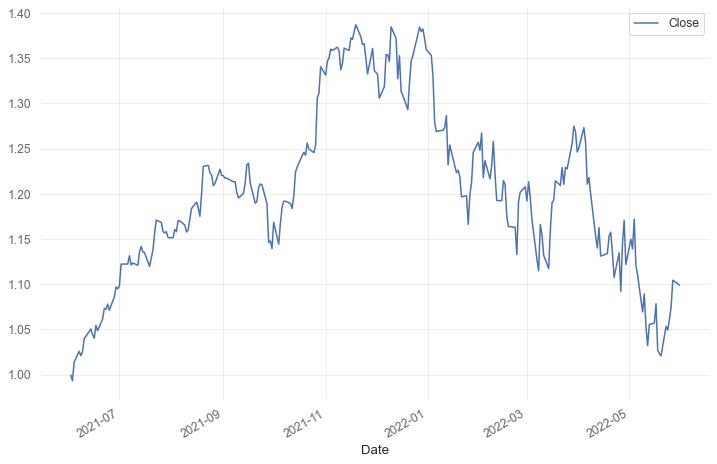

In [238]:
# Import matplotlib
import matplotlib.pyplot as plt 

# Plot the cumulative daily returns
cum_daily_return.plot(figsize=(12,8))
plt.show()

In [239]:
# Resample the cumulative daily return to cumulative monthly return 
cum_monthly_return = cum_daily_return.resample("M").mean()

# Print the `cum_monthly_return`
print(cum_monthly_return)

               Close
Date                
2021-06-30  1.049197
2021-07-31  1.137843
2021-08-31  1.189629
2021-09-30  1.199977
2021-10-31  1.226930
2021-11-30  1.357603
2021-12-31  1.345221
2022-01-31  1.247947
2022-02-28  1.207476
2022-03-31  1.195431
2022-04-30  1.167383
2022-05-31  1.078129


In [240]:
# Isolate the adjusted closing prices 
adj_close_px = msft['Adj Close']

# Calculate the moving average for 100 window
moving_avg = adj_close_px.rolling(window=100).mean()

# Inspect the result
moving_avg[-10:]

Date
2022-05-17    296.200394
2022-05-18    295.408962
2022-05-19    294.530869
2022-05-20    293.658924
2022-05-23    292.860909
2022-05-24    292.078779
2022-05-25    291.355518
2022-05-26    290.681688
2022-05-27    290.138406
2022-05-31    289.707170
Name: Adj Close, dtype: float64

##Building A Momentum Trading Strategy

In [241]:
# Initialize the short and long windows
short_window = 6
long_window = 100

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=msft.index)  
signals['signal'] = 0.0  

# Short simple moving average is created
signals['short_mavg'] = msft['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# long simple moving average is created
signals['long_mavg'] = msft['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals and positions
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   
signals['positions'] = signals['signal'].diff()

print(signals)

            signal  short_mavg   long_mavg  positions
Date                                                 
2021-06-01     0.0  247.399994  247.399994        NaN
2021-06-02     0.0  247.349998  247.349998        0.0
2021-06-03     0.0  246.803335  246.803335        0.0
2021-06-04     0.0  247.799999  247.799999        0.0
2021-06-07     0.0  249.001999  249.001999        0.0
...            ...         ...         ...        ...
2022-05-24     0.0  257.811666  292.932500        0.0
2022-05-25     0.0  257.094996  292.194500        0.0
2022-05-26     0.0  259.064995  291.506000        0.0
2022-05-27     0.0  262.414993  290.948300        0.0
2022-05-31     0.0  265.633326  290.503199        0.0

[253 rows x 4 columns]


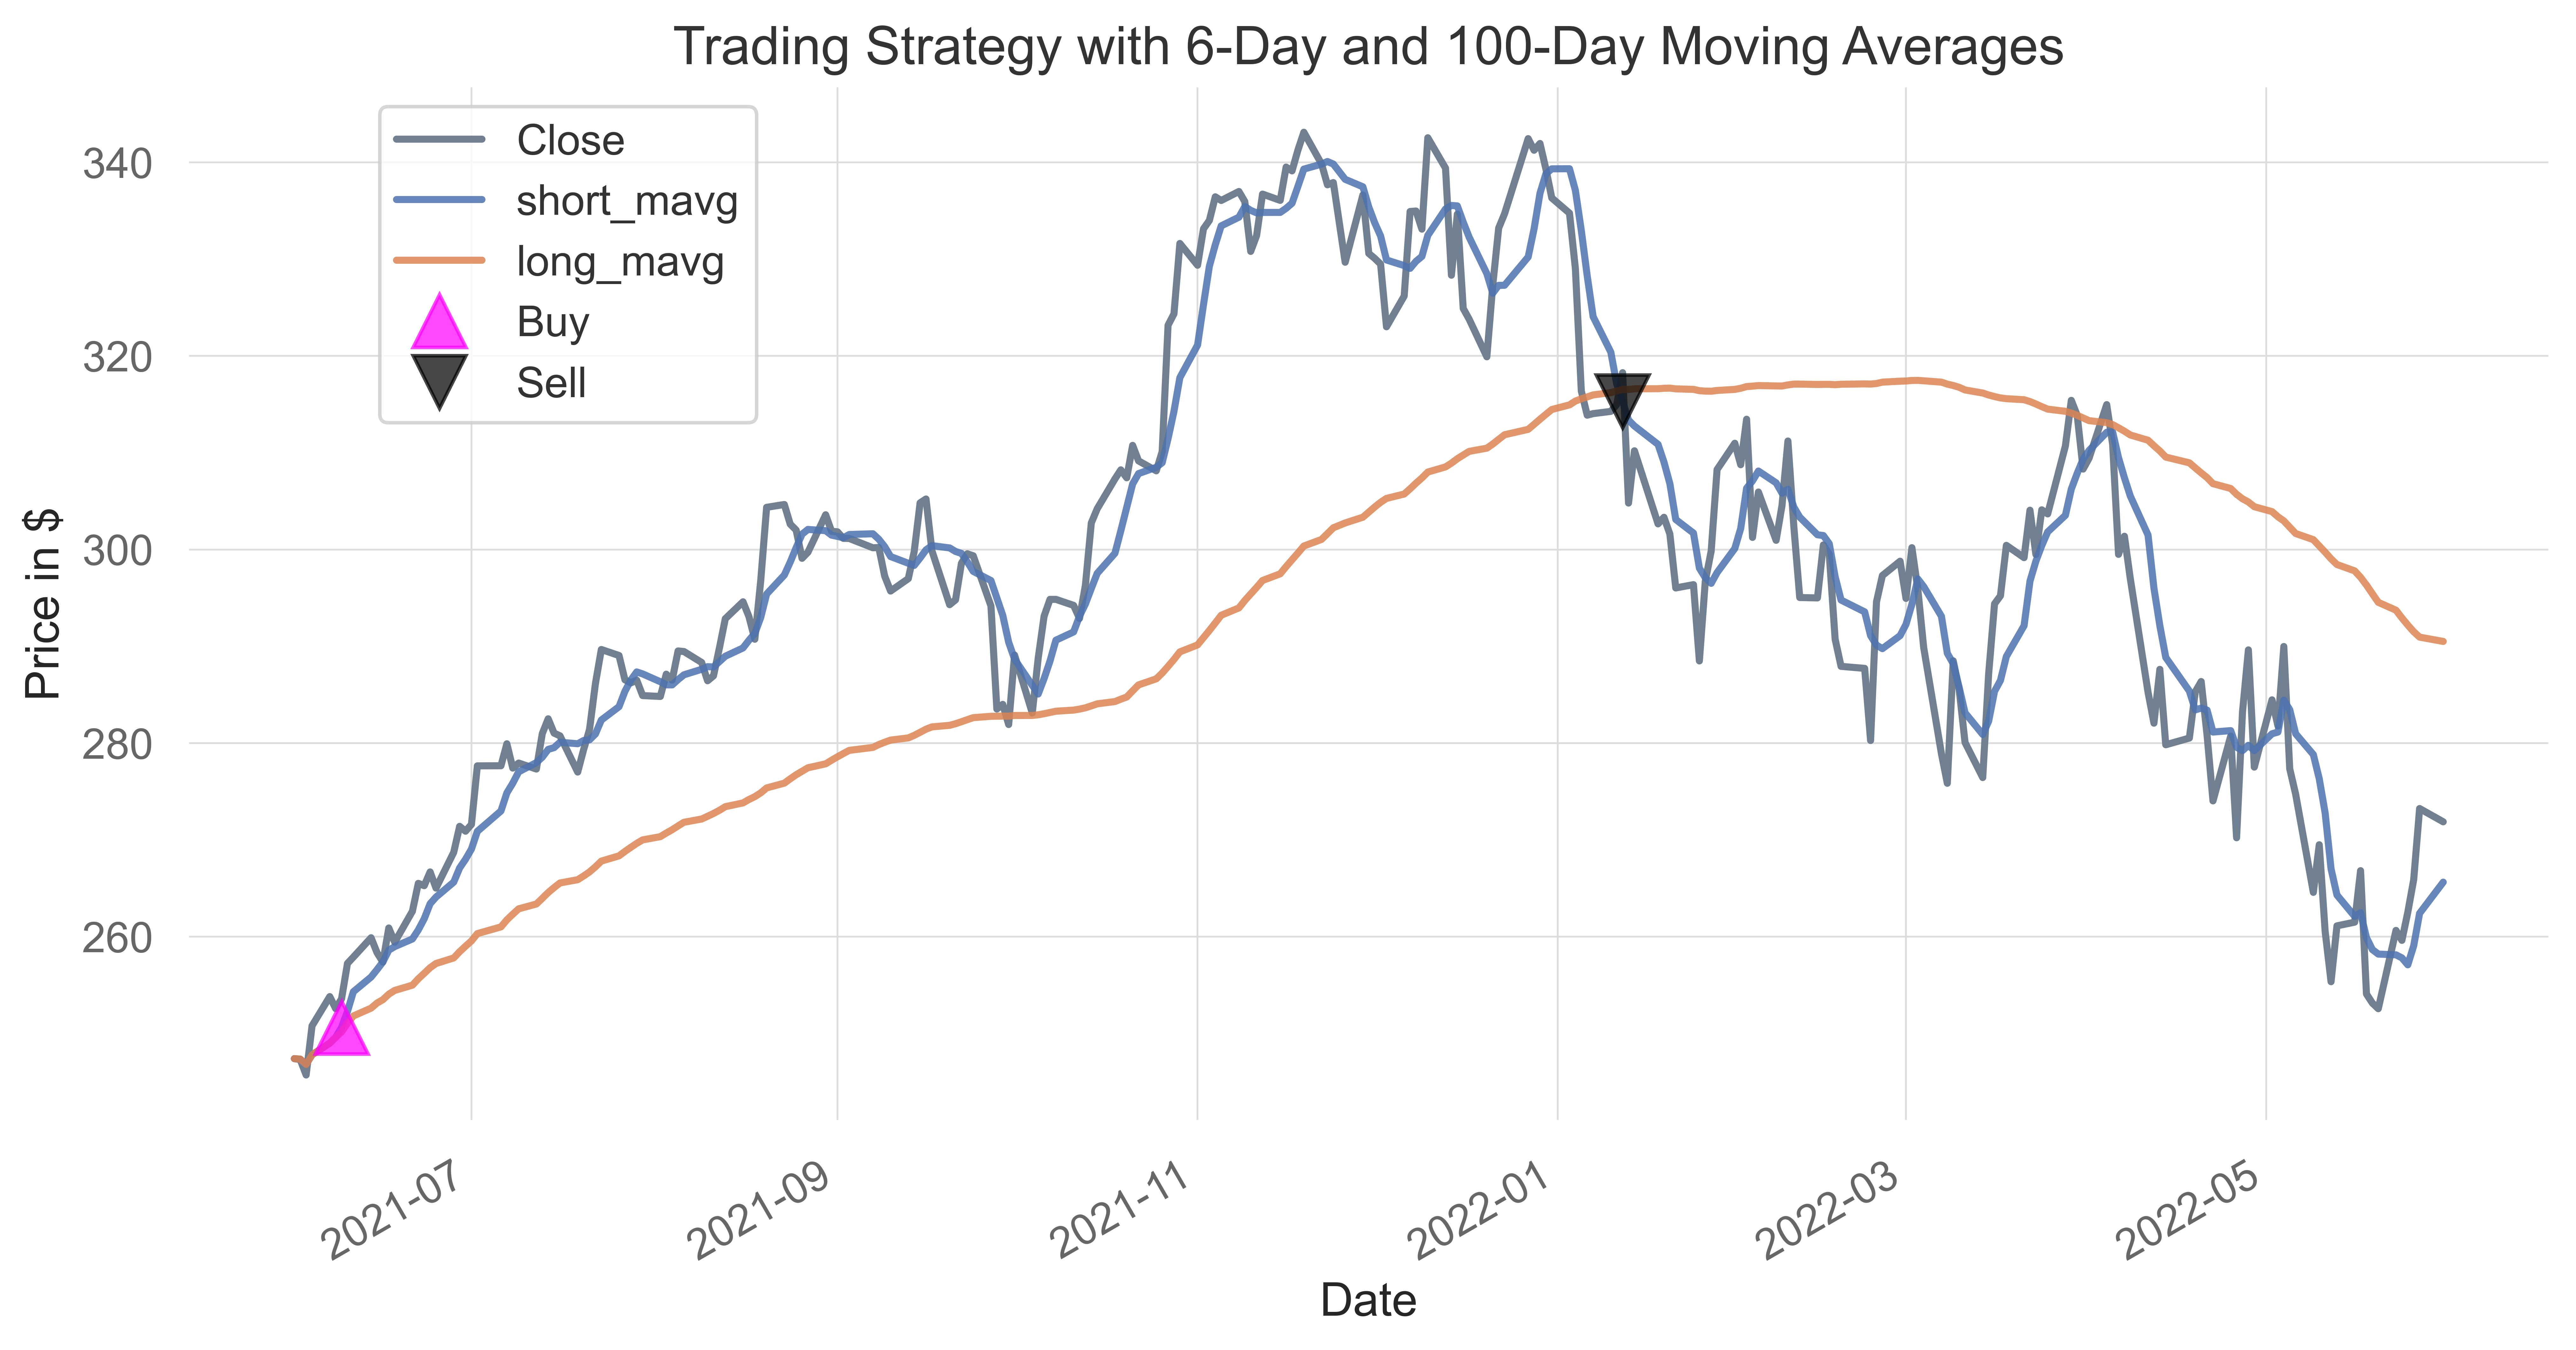

In [248]:
# Initialize the plot figure
fig = plt.figure(figsize=(12, 6), dpi=800)
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
msft['Close'].plot(ax=ax1, color='slategrey', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, alpha = 0.85, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=15, color='fuchsia', label = "Buy",alpha = 0.72)#color='m'
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=15, color='black', label = "Sell",alpha = 0.72) # original markersize=10
plt.title(f'Trading Strategy with {short_window}-Day and {long_window}-Day Moving Averages', fontsize= 15)
ax1.legend(bbox_to_anchor = [.25, 1])
         
# Show the plot
plt.show()

##Backtesting The Trading Strategy

In [243]:
# Set the initial capital
initial_capital= float(100000.0)

positions = pd.DataFrame(index=signals.index).fillna(0.0)  

# 100 shares is brought
positions['msft'] = 100*signals['signal']   
  
# A new DataFrame portfolio is created to store the market value of an open position  
portfolio = positions.multiply(msft['Adj Close'], axis=0)

# Store the differences in positions
pos_diff = positions.diff()

# A new column 'holdings' is created in the portfolio DataFrame
portfolio['holdings'] = (positions.multiply(msft['Adj Close'], axis=0)).sum(axis=1)

# `cash` in portfolio is the capital that is still available to be spent
portfolio['cash'] = initial_capital - (pos_diff.multiply(msft['Adj Close'], axis=0)).sum(axis=1).cumsum()   

# `total` in portfolio contains the sum of cash and the holdings.
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# `returns` in portfolio is used to store the returns
portfolio['returns'] = portfolio['total'].pct_change()

#Visualizing the Equity Curve

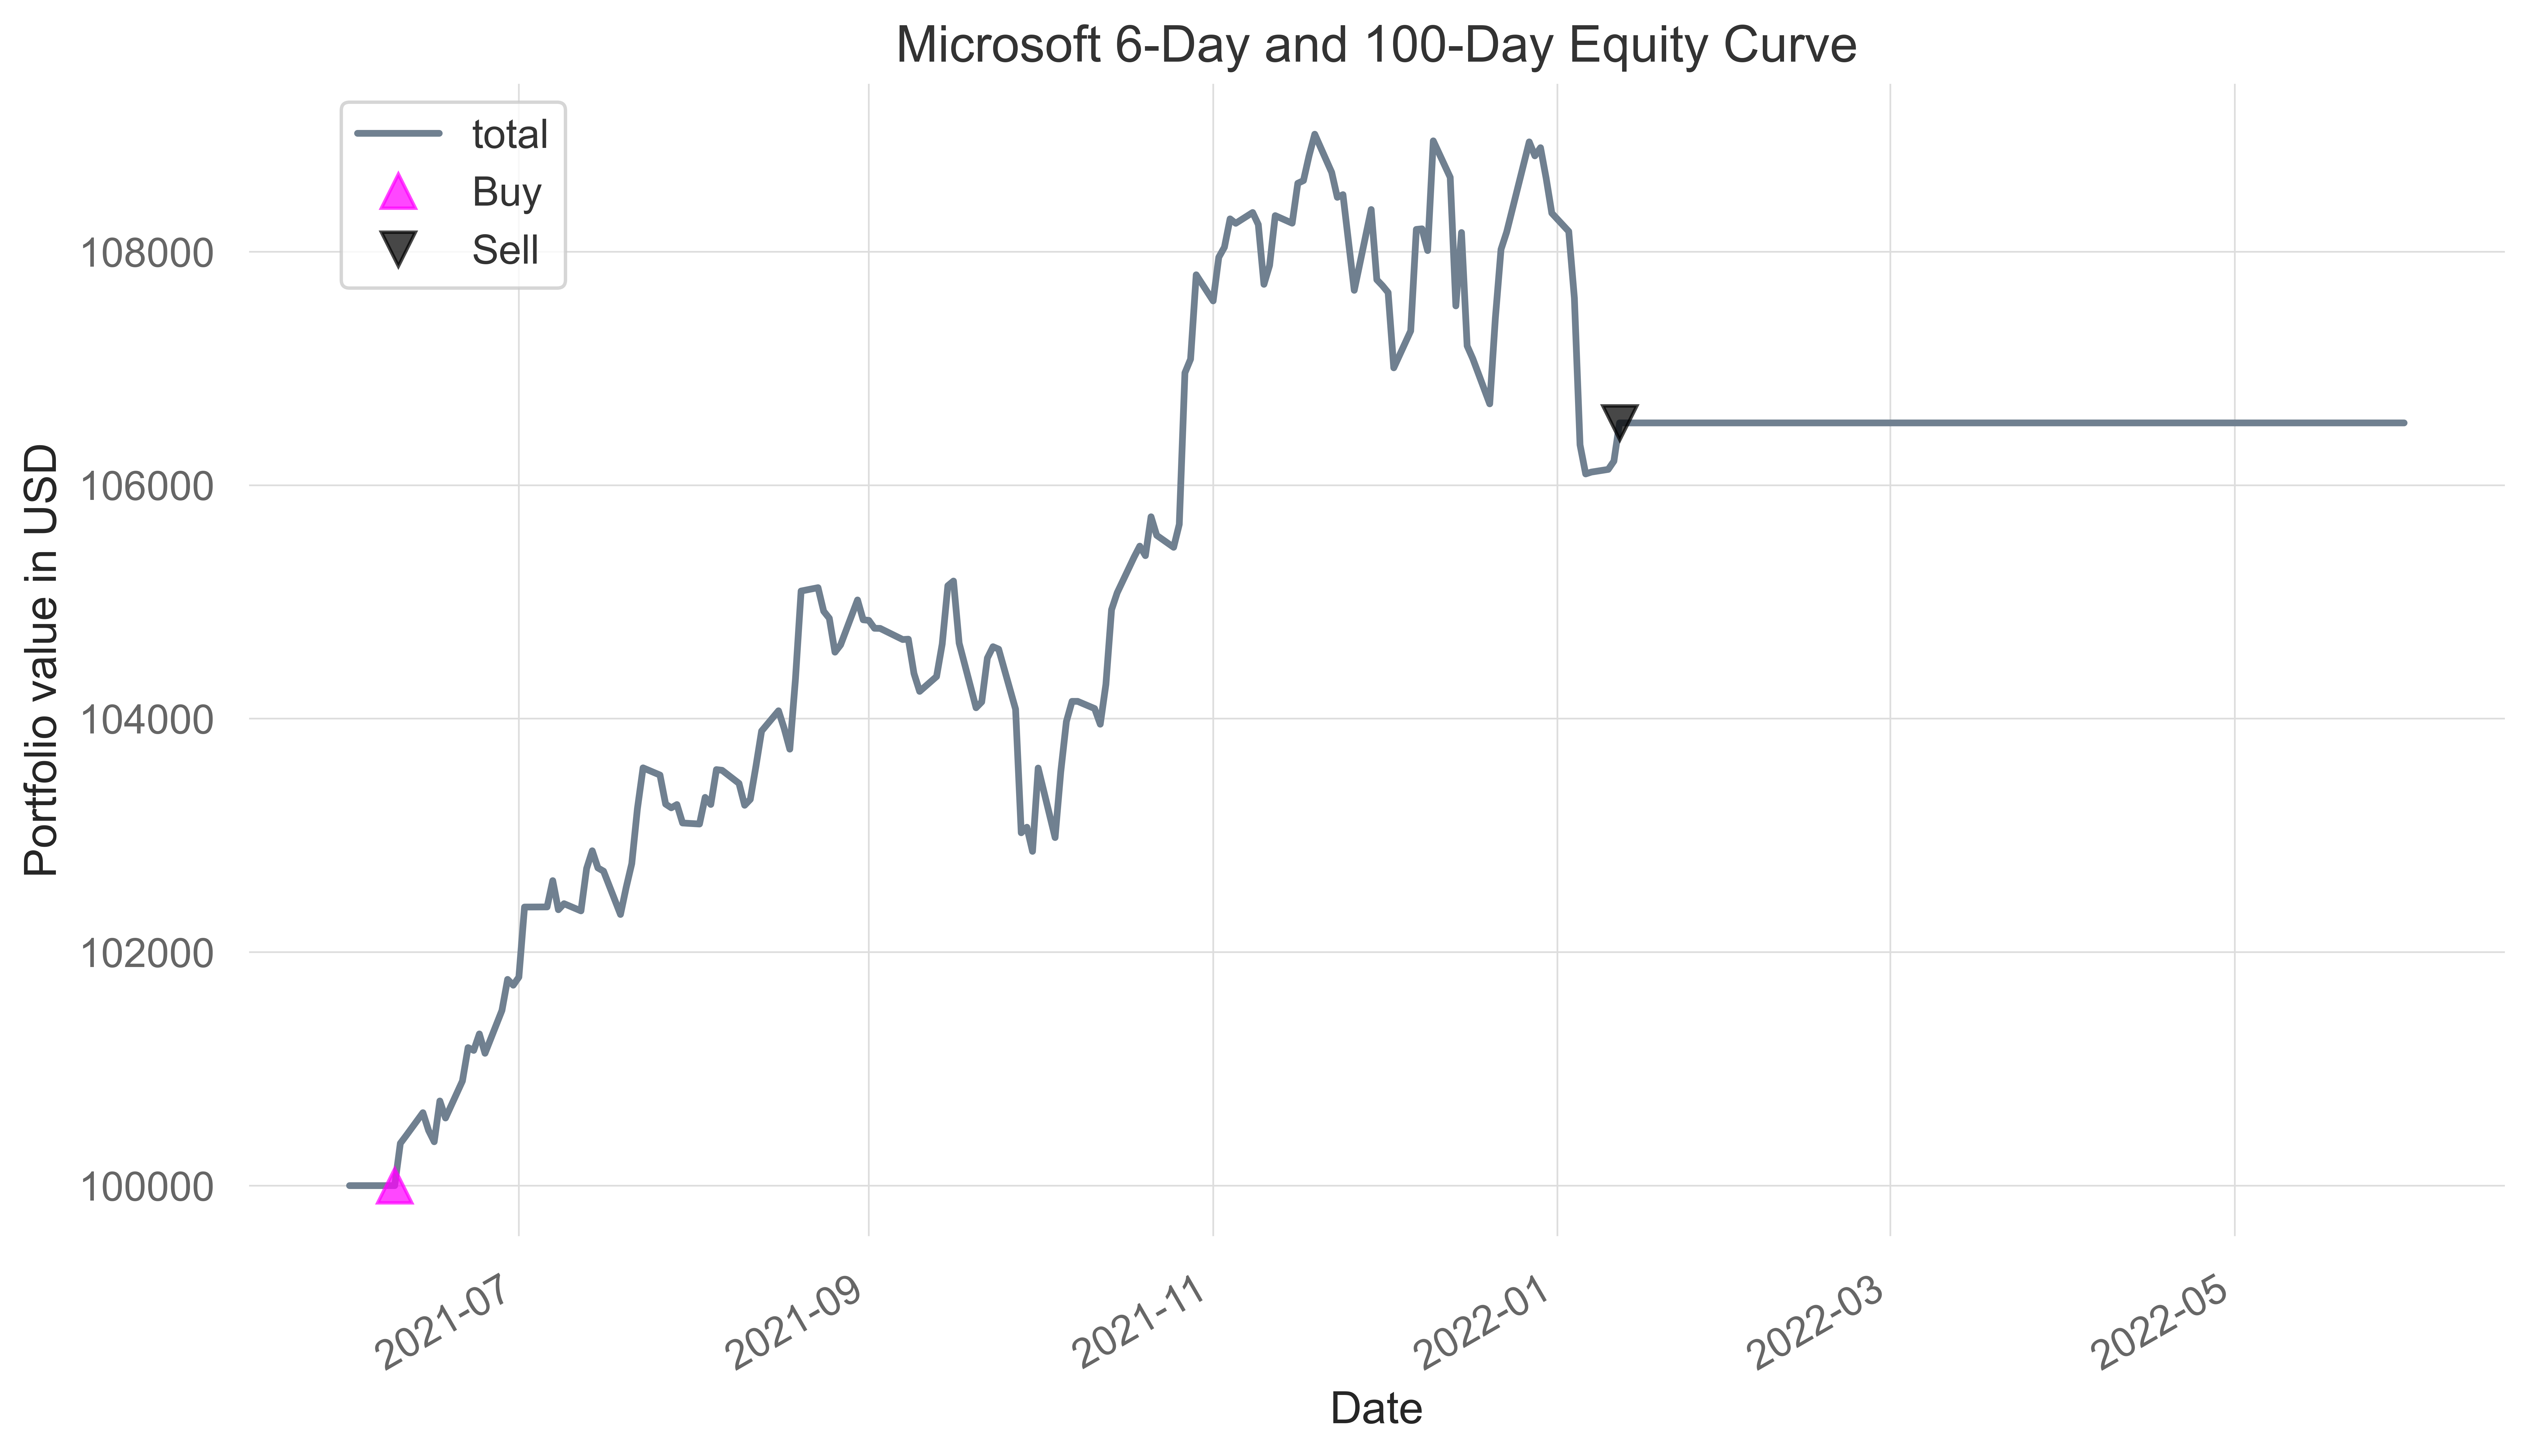

In [244]:
# Initialize the plot figure
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 7), dpi=800)

ax1 = fig.add_subplot(111, ylabel='Portfolio value in USD')

# Equity curve plot in USD
portfolio['total'].plot(ax=ax1, lw=2.,color='slategrey') 

# Plot the "buy" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='fuchsia', label = "Buy",alpha = 0.72)

# Plot the "sell" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='black', label = "Sell",alpha = 0.72)
ax1.legend(bbox_to_anchor = [0.15, 1])
plt.title(f'Microsoft {short_window}-Day and {long_window}-Day Equity Curve', fontsize= 15,fontweight = 20)

# Show the plot
plt.show()

#Improving The Trading Strategy 
#Evaluating Moving Average Crossover Strategy using Sharpe Ratio


In [245]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# Annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

1.4441682143653063


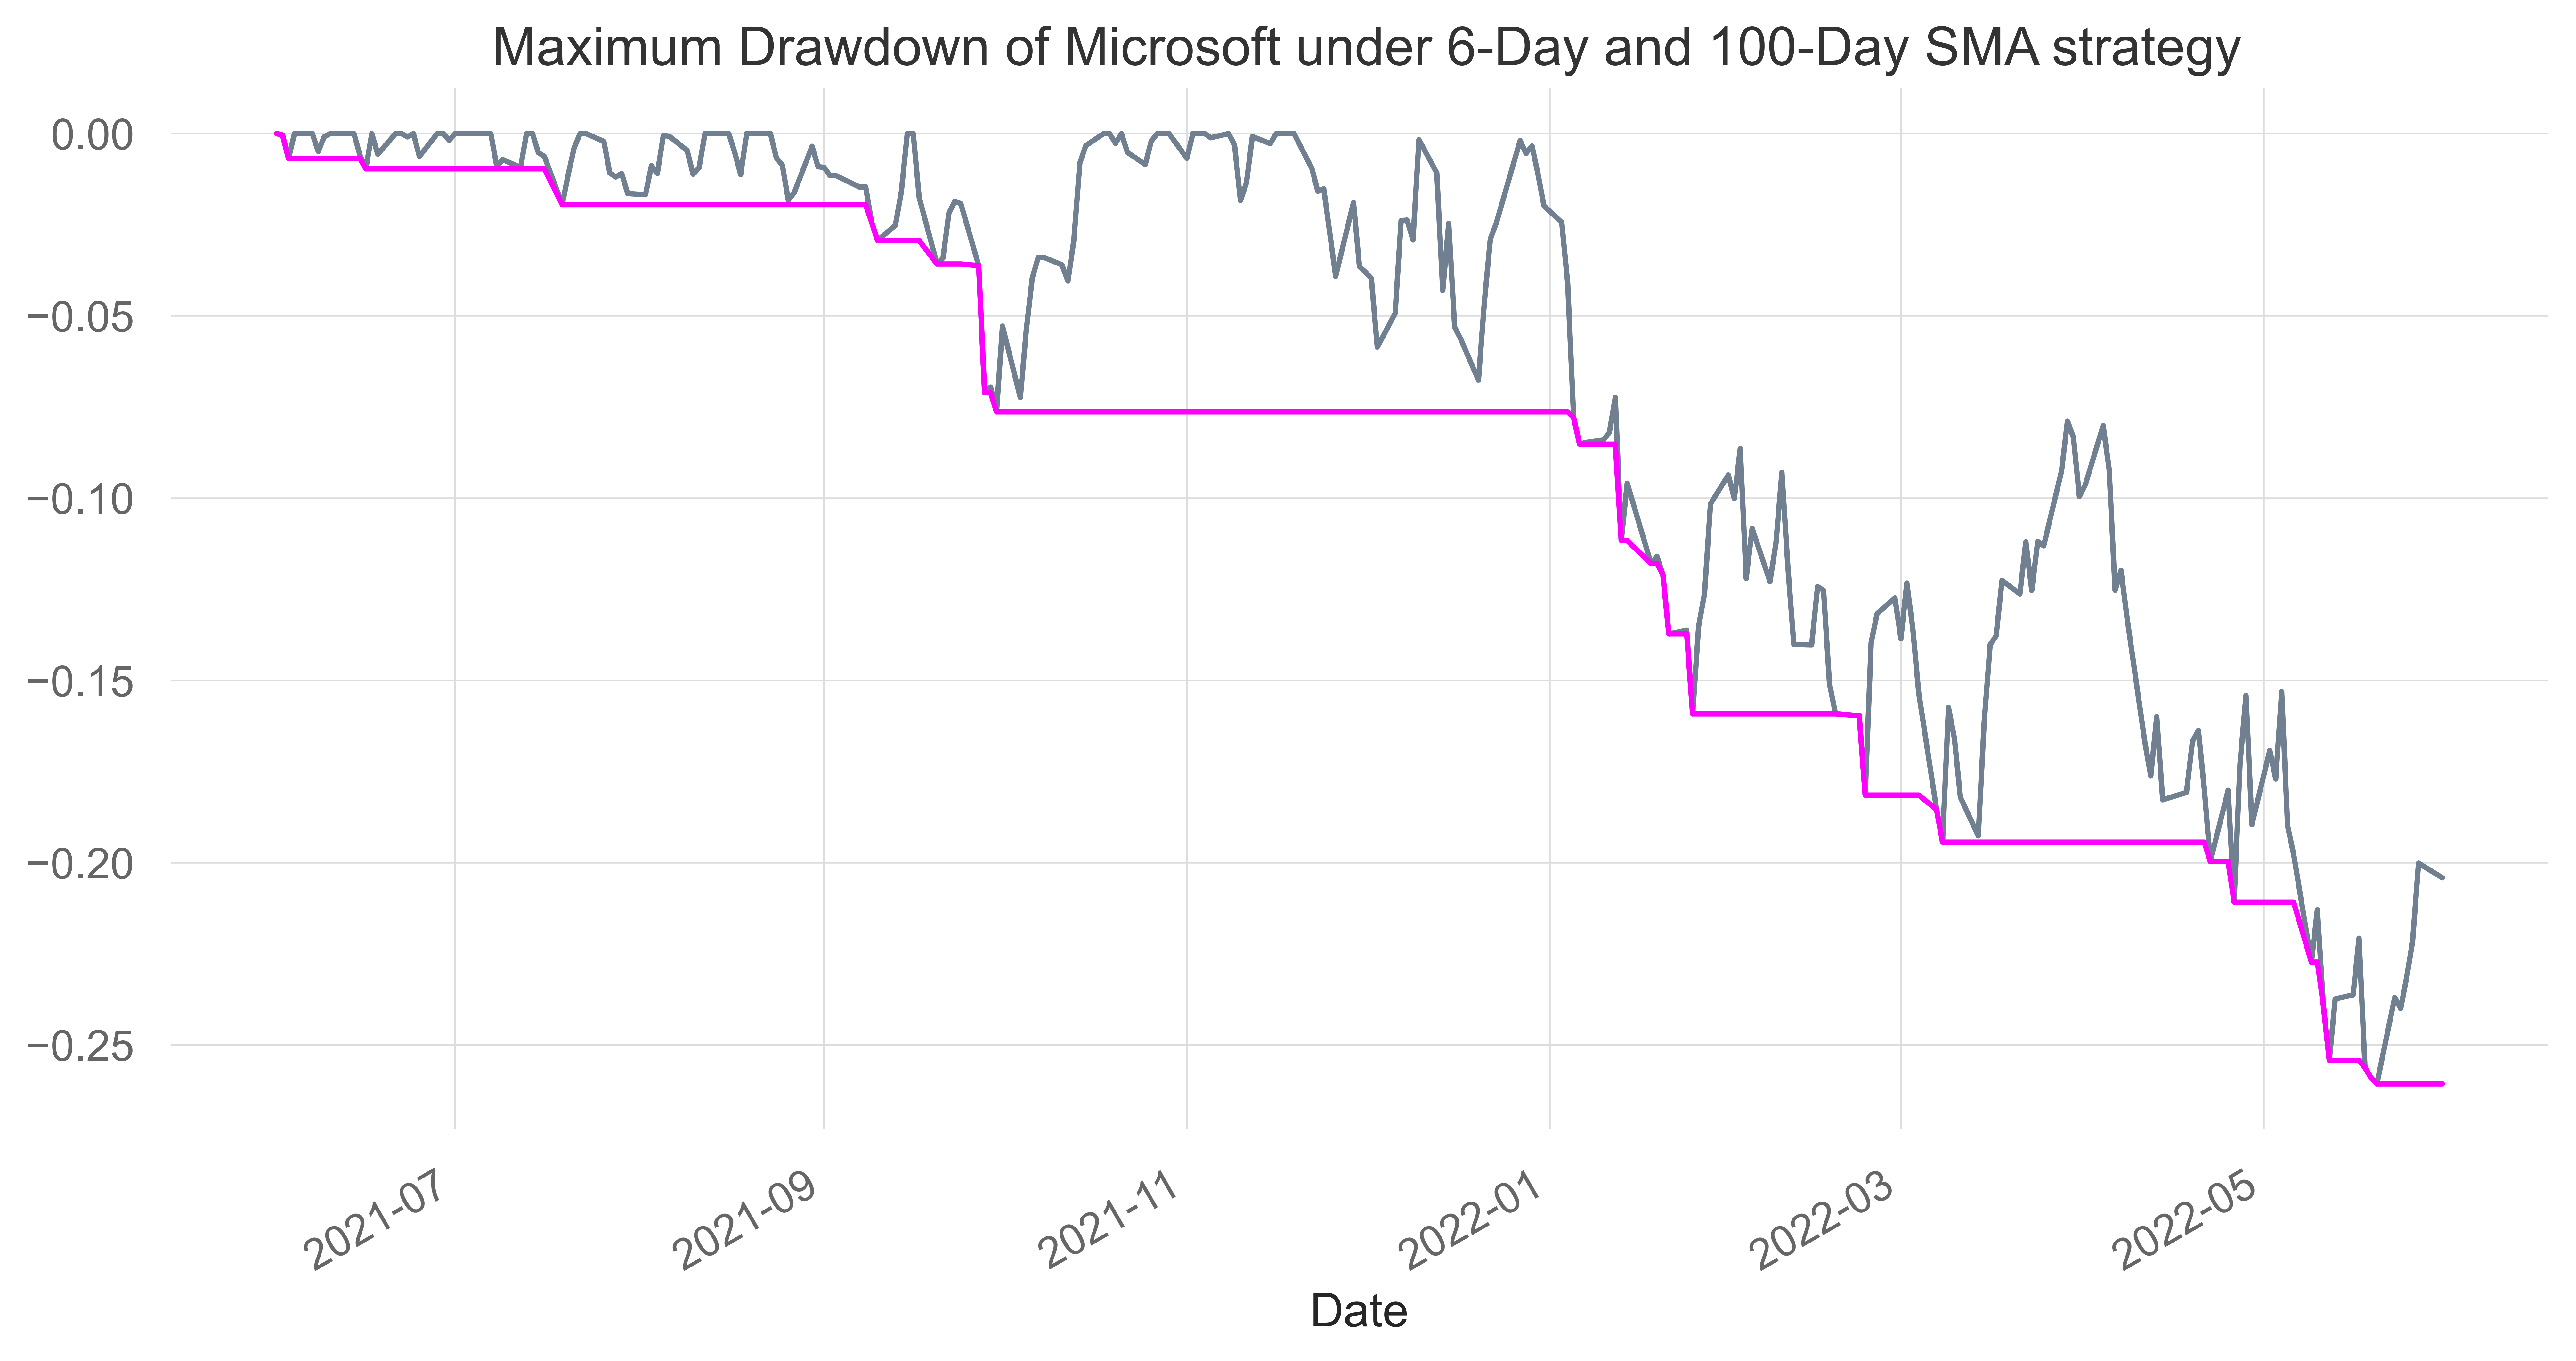

In [246]:
# Initialize the plot figure
fig = plt.figure(figsize=(12, 6), dpi=800)
plt.title(f' Maximum Drawdown of Microsoft under {short_window}-Day and {long_window}-Day SMA strategy', fontsize= 15)

# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day
rolling_max = msft['Adj Close'].rolling(window, min_periods=1).max()
daily_drawdown = msft['Adj Close']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot(color='slategrey')
max_daily_drawdown.plot(color='fuchsia')

# Show the plot
plt.show()

In [249]:
#!pip install quantstats
import quantstats
quantstats.reports.html(portfolio['returns'], title= f'Microsoft {short_window}-Day and {long_window}-Day SMA Strategy Backtest Tearsheet', fontsize= 15)